# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Load the Data and Perform Analysis

In [9]:
import pandas as pd
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

In [10]:
df = pd.read_excel ('Online Retail.xlsx',dtype = {'CustomerID' : str})
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [11]:
numeric_cols = df.select_dtypes(include = ['float','int']).columns
categorical_cols = df.select_dtypes(include = ['object']).columns

In [12]:
# Check the dataset, handle duplicate and missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [15]:
df[df.duplicated()].shape

(5268, 8)

In [16]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [18]:
df = df.fillna(method = 'pad')
df.isnull().sum()

C:\Users\banga\AppData\Local\Temp\ipykernel_14604\2946364319.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'pad')


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
# Boxplot is used to detect outliers and replace them with the mean value using the IQR technique

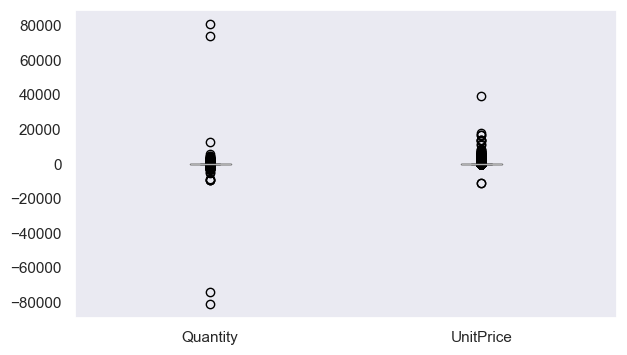

In [20]:
plt.figure(figsize = (7,4))
df.boxplot(column = ['Quantity','UnitPrice'], grid = False)
sns.set_style('ticks')
plt.show()

In [21]:
df[numeric_cols].mean()

Quantity     9.620029
UnitPrice    4.632656
dtype: float64

In [22]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
Out_Low = Q1 - 2*IQR
Out_High = Q3 + 2*IQR
Outliers = df[((df[numeric_cols] < Out_Low)|(df[numeric_cols] > Out_High))]
df[numeric_cols] = np.where(((df[numeric_cols] < Out_Low)|(df[numeric_cols] > Out_High)), round(df[numeric_cols].mean(),2),df[numeric_cols])
Outliers.shape
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,5.941172,2011-07-04 08:57:06.087421952,2.740825
min,-17.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,9.620000,2011-10-18 17:05:00,4.130000
max,28.000000,2011-12-09 12:50:00,9.890000
std,6.268974,NaN,2.045168


In [23]:
# Add some columns to support the analysis

In [24]:
df['Sales'] = round(df['Quantity']*df['UnitPrice'],2)
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df.InvoiceDate.dt.month
df['Year'] = df.InvoiceDate.dt.year
df['Weekday'] = df.InvoiceDate.dt.weekday
print(sum(df.Quantity))
print(sum(df.Sales))
df.head(3)

3188276.54
6213415.18


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Month,Year,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,12,2010,2
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,12,2010,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,12,2010,2


In [25]:
# Visualize different aspects of the data to gain insights into the dataset

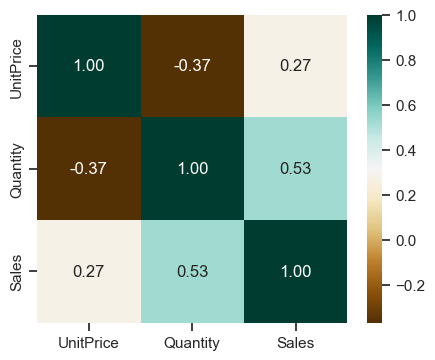

In [26]:
plt.figure(figsize = (5,4))
c = df[['UnitPrice','Quantity','Sales']].corr()
sns.heatmap(c, fmt = '.2f', annot_kws = {'size': 12},annot = True,cmap="BrBG")
plt.show()

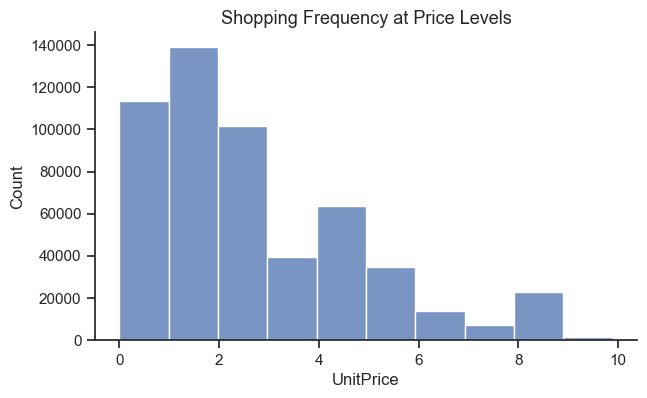

In [27]:
plt.figure(figsize = (7,4))
sns.histplot(df.UnitPrice, bins = 10)
sns.set_style('ticks')
plt.title('Shopping Frequency at Price Levels', fontsize = 13)
sns.despine()
plt.show()

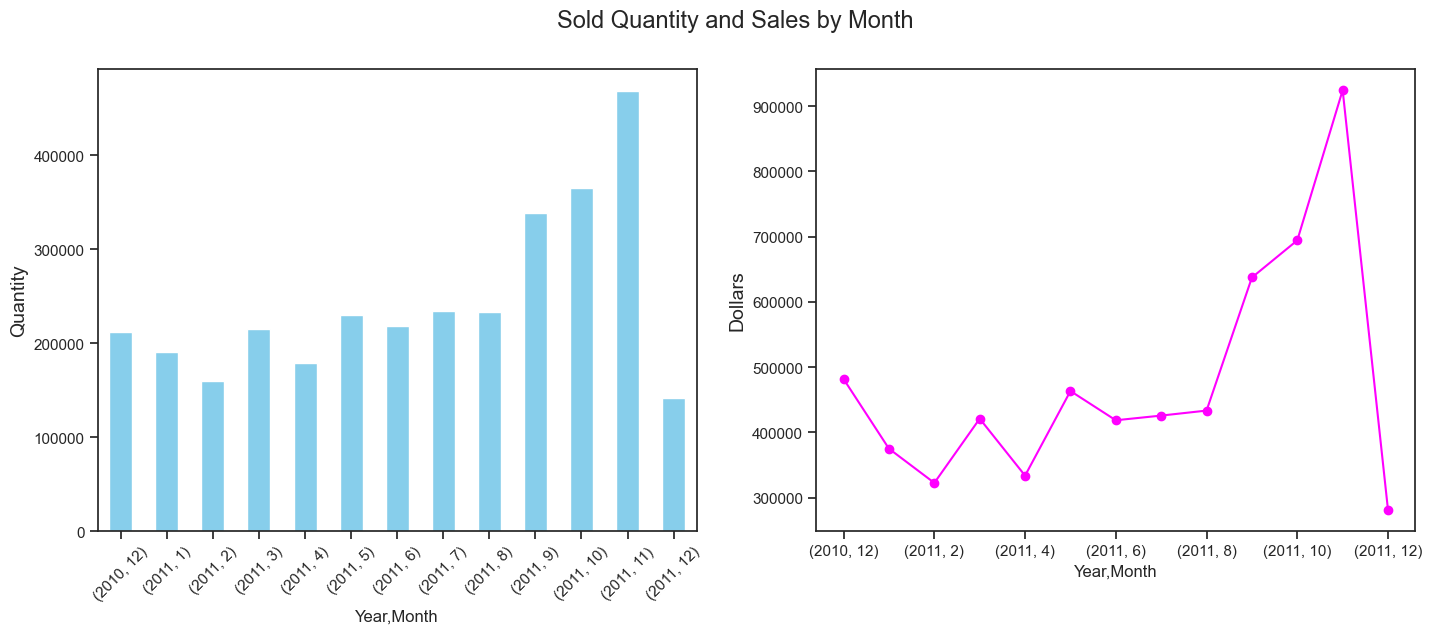

3188276.54
6213415.18


In [28]:
sales = df[['Year','Month','Quantity','Sales']].groupby(['Year','Month']).sum()
x,y,z = sales.index, sales.Quantity, sales.Sales
plt.figure(figsize = (17,6))
plt.subplot(121)
y.plot(kind = 'bar', color = 'skyblue')
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(rotation = 45)

plt.subplot(122)
z.plot(marker ='o', color = 'magenta')
plt.ylabel('Dollars', fontsize = 14)
plt.suptitle('Sold Quantity and Sales by Month', fontsize = 17)
plt.show()
print(sum(y))
print(sum(z))

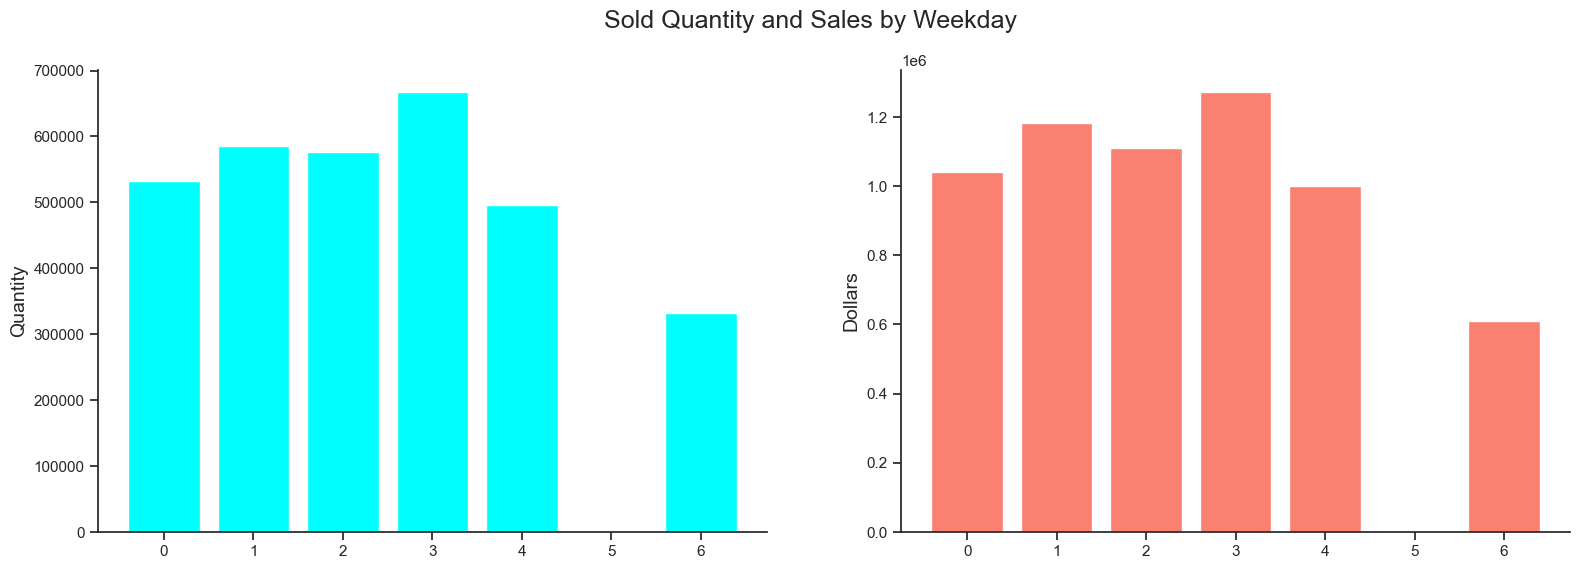

In [29]:
week = df.groupby('Weekday')[['Quantity','Sales']].sum()
x,y,z = week.index, week.Quantity, week.Sales
fig, ax = plt.subplots(1,2, figsize = (19,6))
ax[0].bar(x, y, color = 'cyan')
ax[0].set_ylabel('Quantity', fontsize = 14)
ax[1].bar(x,z, color = 'salmon')
ax[1].set_ylabel('Dollars', fontsize = 14)
plt.suptitle('Sold Quantity and Sales by Weekday', fontsize = 18)
sns.set_style('ticks')
sns.despine()
plt.show()

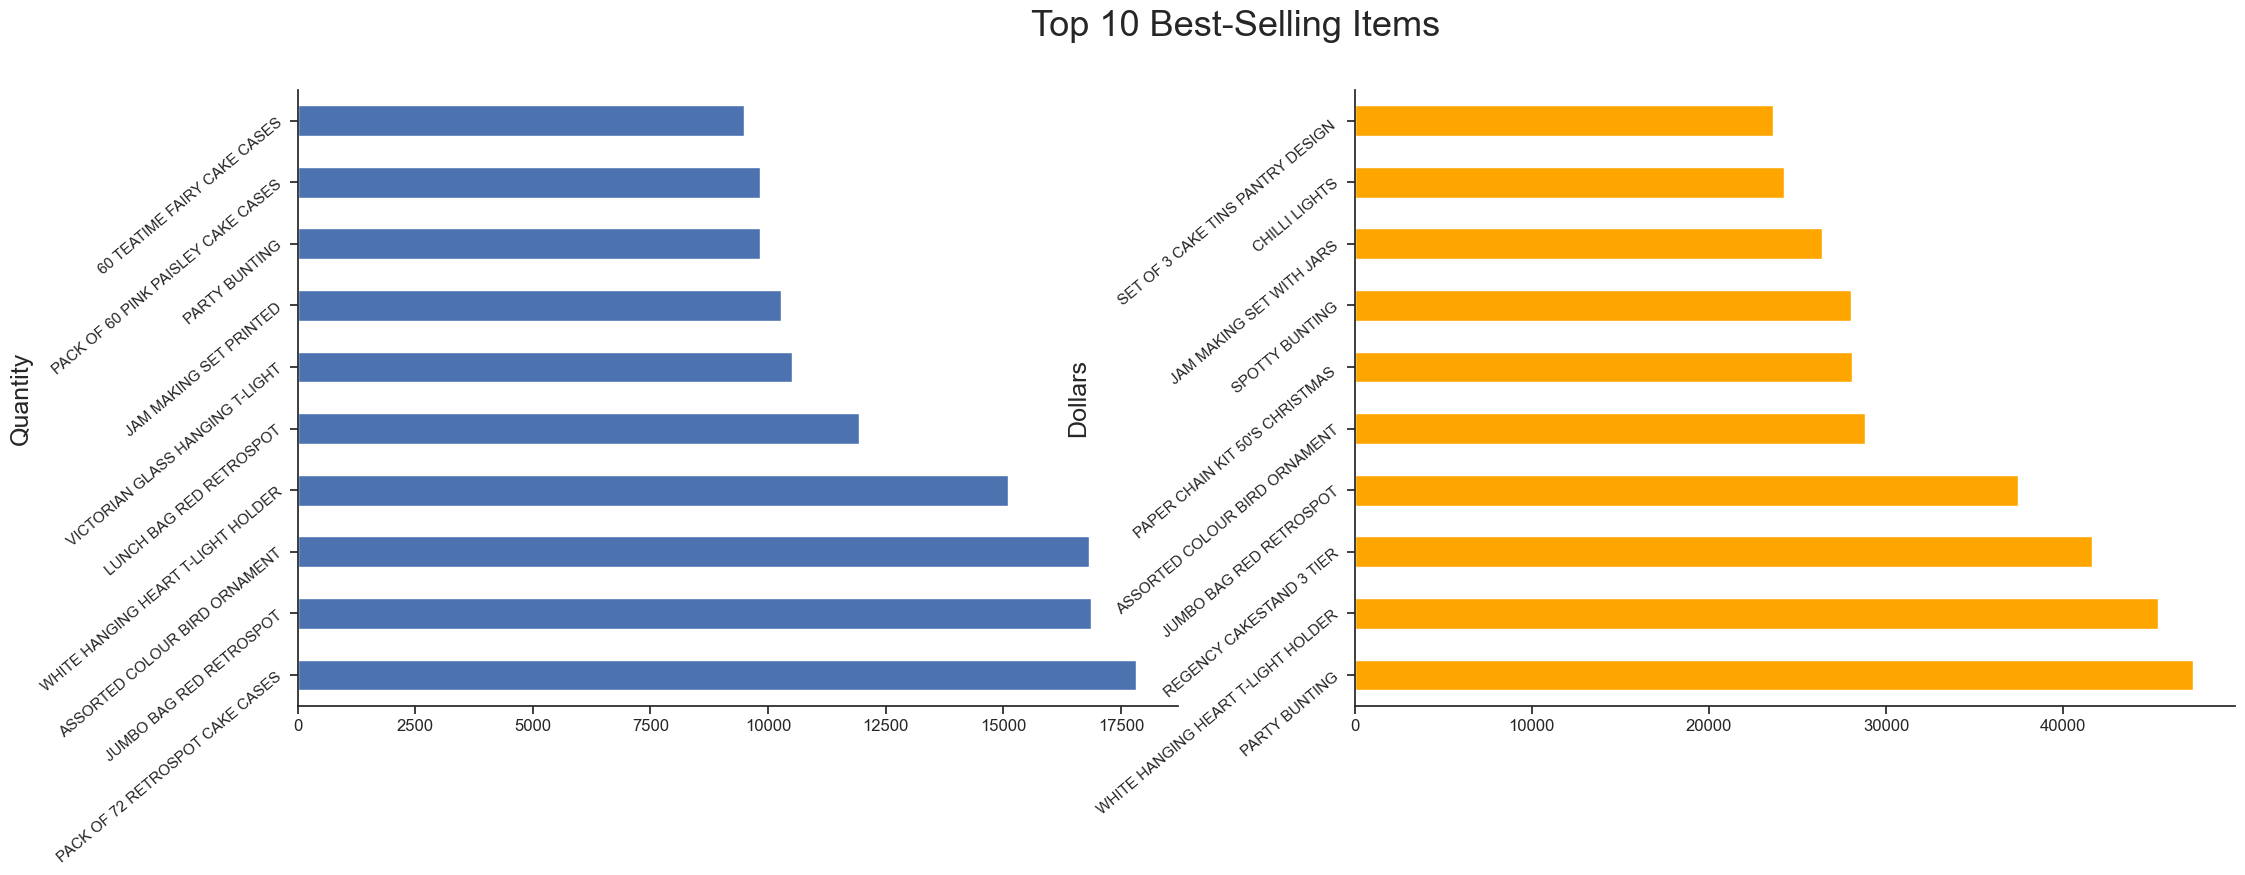

3188276.54
6213415.18


In [30]:
items = df.groupby('Description')[['Quantity','Sales']].sum()
x,y,z = items.index, items.Quantity, items.Sales
plt.figure(figsize = (25,8))
plt.subplot(121)
y.nlargest(10).plot(kind = 'barh')
plt.ylabel('Quantity', fontsize = 18)
plt.yticks(rotation =40)
plt.xticks(fontsize = 12)
plt.subplot(122)
z.nlargest(10).plot(kind = 'barh', color = 'orange')
plt.ylabel('Dollars', fontsize = 18)
plt.yticks(rotation =40)
plt.xticks(fontsize = 12)
plt.suptitle('Top 10 Best-Selling Items', fontsize = 26)
sns.set_theme( style = 'ticks', palette = 'deep')
sns.despine()
plt.show()
print(sum(y))
print(sum(z))

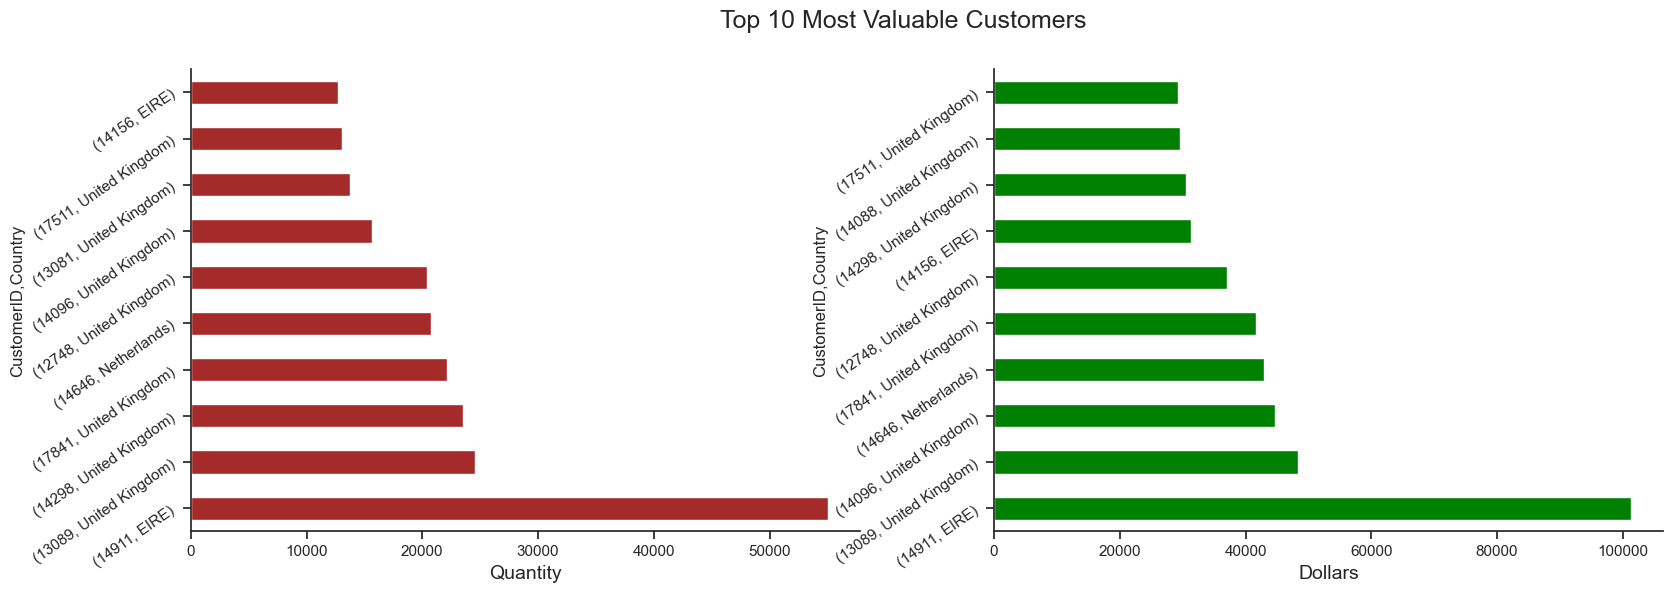

In [31]:
cus = df.groupby(['CustomerID','Country'])[['Quantity','Sales']].sum()
x,y = cus.Quantity, cus.Sales
plt.figure(figsize = (19,6))
plt.subplot(121)
x.nlargest(10).plot(kind = 'barh', color = 'brown')
plt.yticks(rotation = 35)
plt.xlabel('Quantity', fontsize = 14)
plt.subplot(122)
y.nlargest(10).plot(kind = 'barh', color = 'green')
plt.yticks(rotation = 35)
plt.xlabel('Dollars', fontsize = 14)
plt.suptitle('Top 10 Most Valuable Customers', fontsize = 18)
sns.set_theme(style = 'ticks', palette = 'bright')
sns.despine()
plt.show()

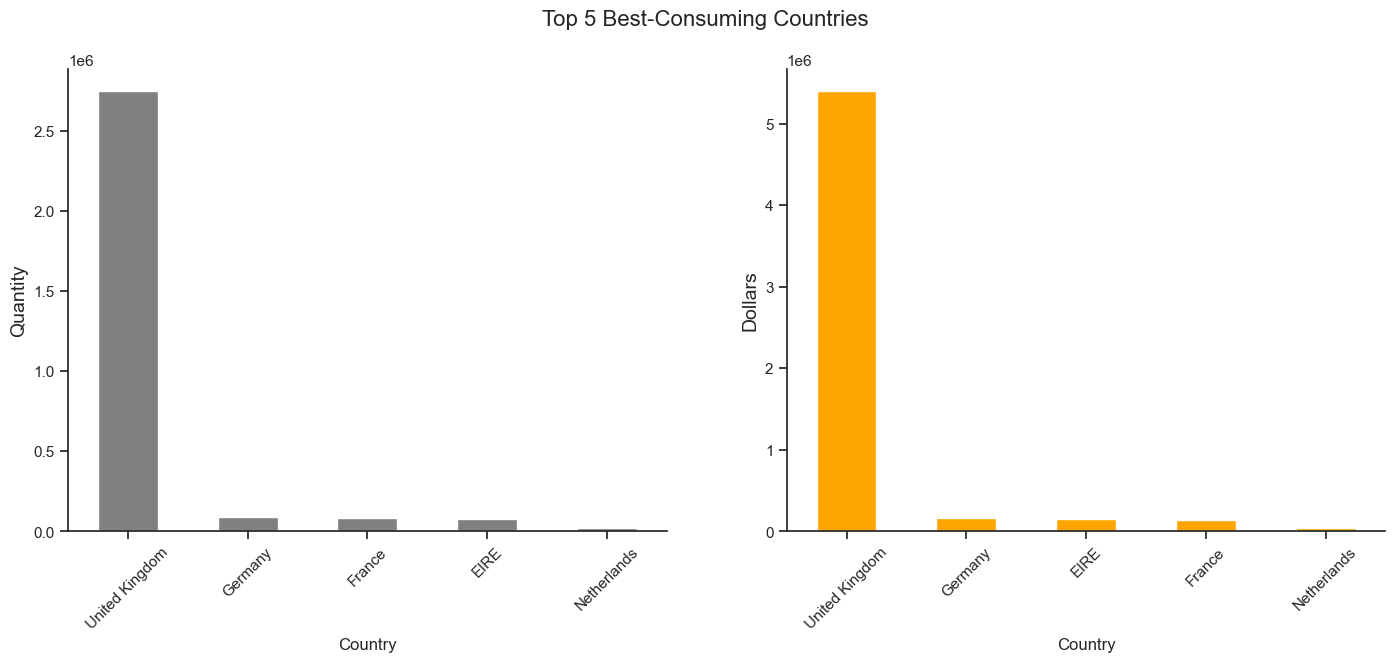

,Quantity,Sales
Country,,
United Kingdom,2749931.52,5394945.39
Germany,91312.74,163128.90
EIRE,75420.30,146999.23
France,83160.06,144493.63
Netherlands,23685.60,47132.62
Switzerland,21140.90,38600.23
Spain,20370.54,36816.10
Belgium,19209.12,32751.57
Australia,11578.06,27398.82


In [32]:
coun = df.groupby('Country')[['Quantity','Sales']].sum()
x,y,z = coun.index, coun.Quantity, coun.Sales
plt.figure(figsize = (17,6))
plt.subplot(121) 
y.nlargest(5).plot(kind = 'bar',color = 'grey')
plt.ylabel('Quantity',fontsize = 14)
plt.xticks(rotation = 45)
plt.subplot(122)
z.nlargest(5).plot(kind = 'bar',color = 'orange')
plt.ylabel('Dollars',fontsize = 14)
plt.xticks(rotation = 45)
plt.suptitle('Top 5 Best-Consuming Countries', fontsize = 16)
sns.set_theme(style = 'ticks', palette = 'colorblind')
sns.despine()
plt.show()
coun.sort_values('Sales',ascending = False)

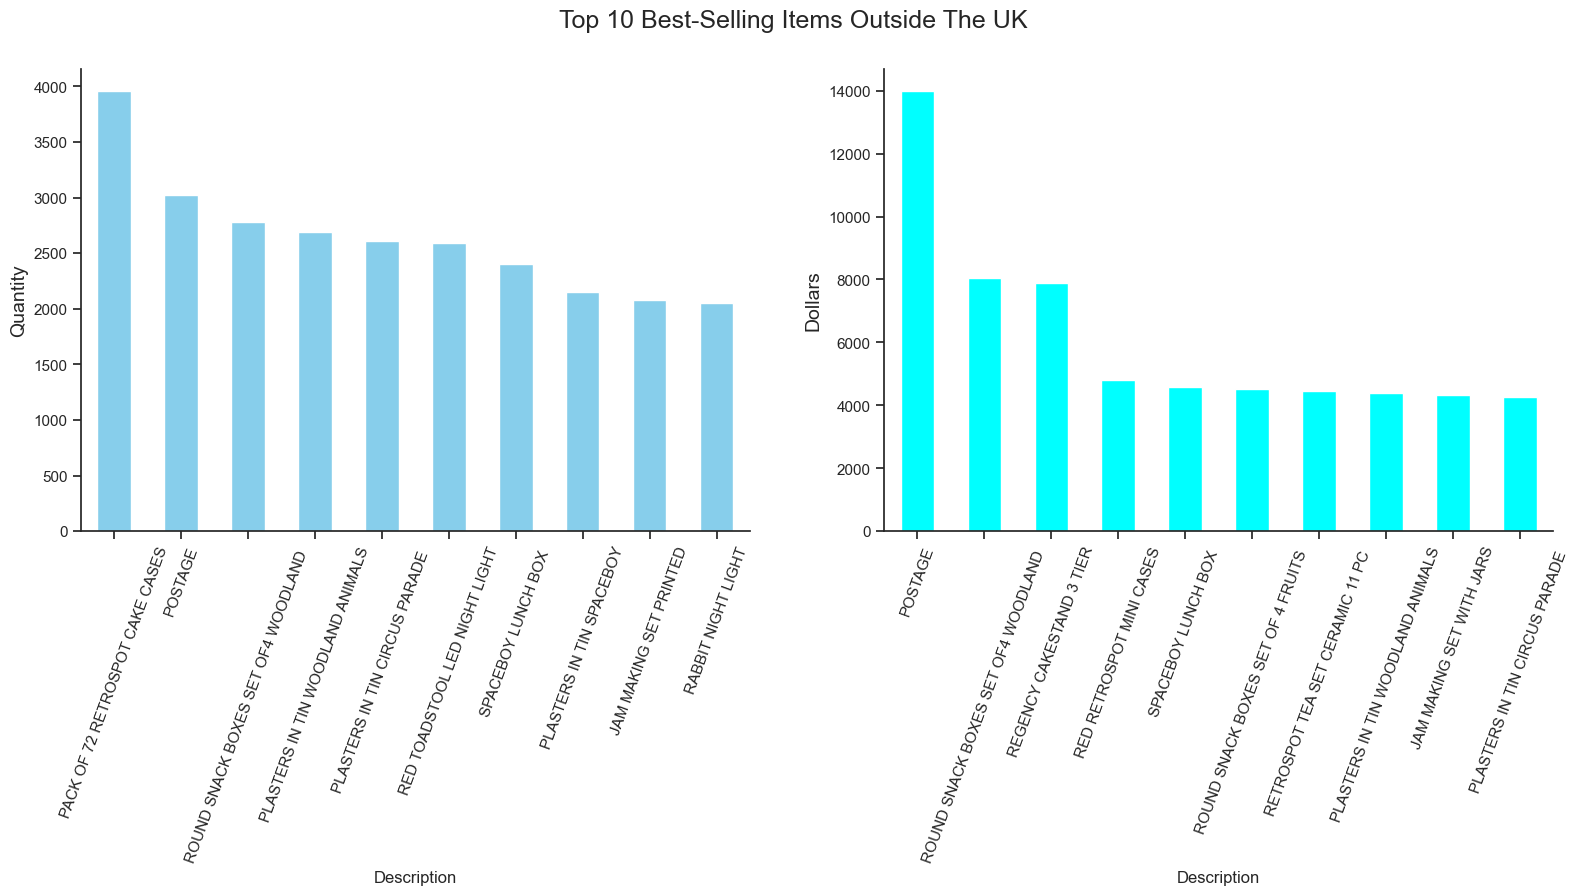

In [33]:
foreign = df[df.Country != 'United Kingdom']

forn = foreign.groupby('Description')[['Quantity','Sales']].sum()
x,y = forn.Quantity, forn.Sales
plt.figure(figsize = (19,6))
plt.subplot(121)
x.nlargest(10).plot(kind = 'bar', color = 'skyblue')
plt.ylabel('Quantity', fontsize = 14)
plt.xticks(rotation = 70)
plt.subplot(122)
y.nlargest(10).plot(kind = 'bar', color = 'cyan')
plt.ylabel('Dollars', fontsize = 14)
plt.xticks(rotation = 70)
plt.suptitle('Top 10 Best-Selling Items Outside The UK', fontsize = 18)
sns.set_theme(style ='ticks', palette = 'colorblind')
sns.despine()
plt.show()